In [3]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




In [26]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




In [4]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None




In [5]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  




In [11]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [13]:
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

In [14]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제

In [15]:
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [16]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




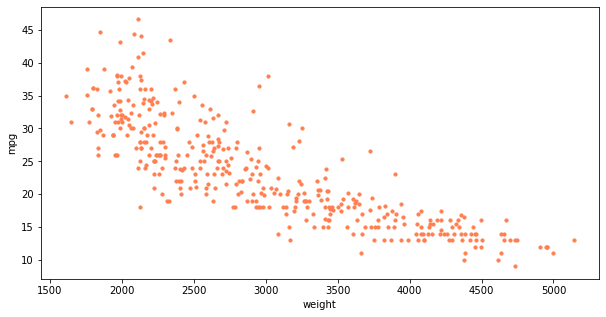

In [17]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

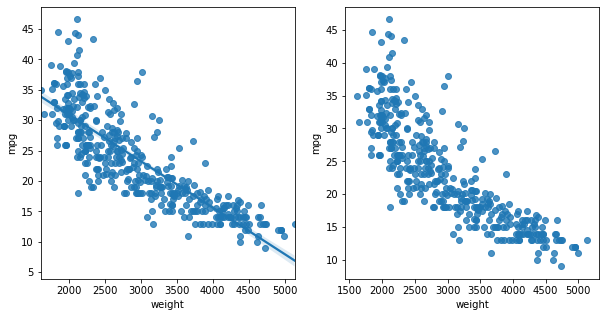

In [18]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

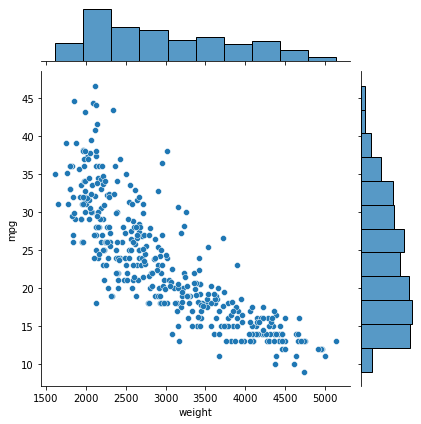

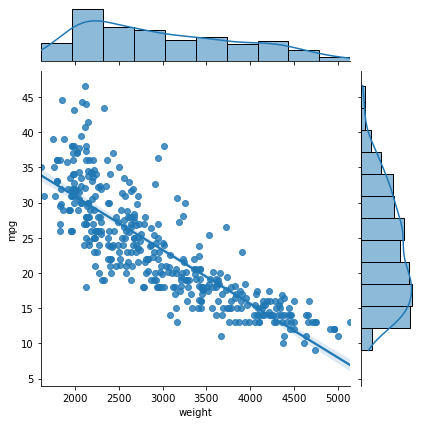

In [19]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

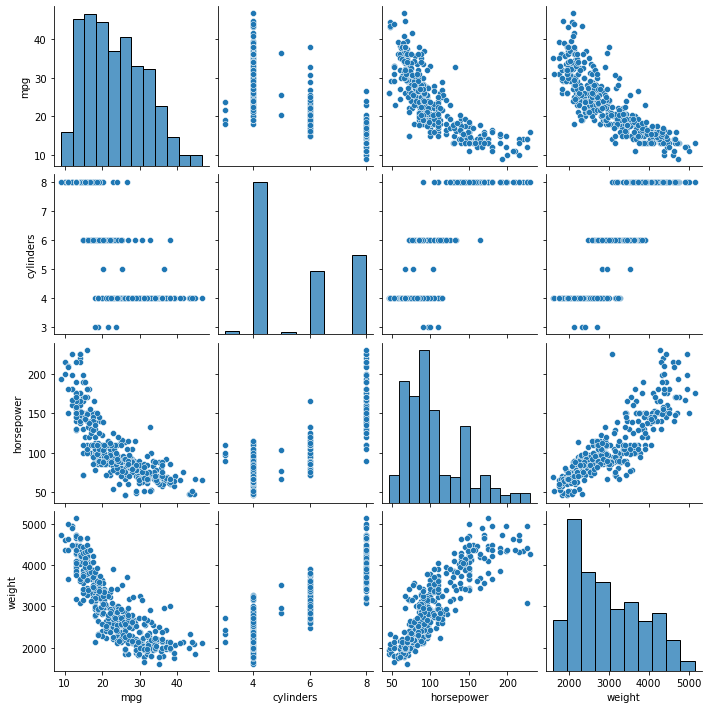

In [21]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [27]:
ndf[['weight']]

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
393,2790.0
394,2130.0
395,2295.0
396,2625.0


In [28]:
ndf['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [22]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [23]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

0.6822458558299325




기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


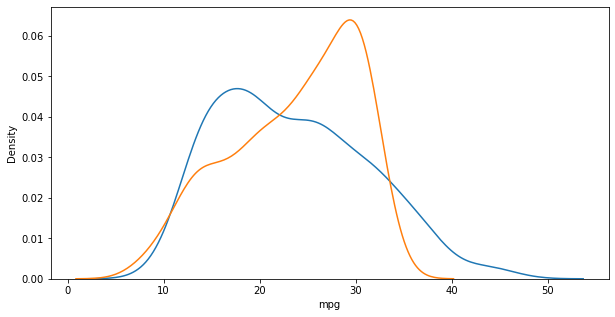

In [24]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [29]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)
df


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [30]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [31]:
print('훈련 데이터 :', X_train.shape)
print('테스트 데이터: ', X_test.shape)

훈련 데이터 : (274, 1)
테스트 데이터:  (118, 1)


In [32]:
# 비선형 회귀함수
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차원으로

In [35]:
print('원 데이터: ', X_train.shape)
print('변형된 데이터 :', X_train_poly.shape)

원 데이터:  (274, 1)
변형된 데이터 : (274, 3)


In [36]:
X_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [38]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

#트레인 데이터를 가지고 모형 학습

LinearRegression()

In [40]:
#합습을 마친 모형에 test data를 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.708700926297548


In [7]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())   
print('\n')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C

In [8]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None




In [9]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)
print('\n')

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']




In [10]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
print('\n')

714




In [11]:
rdf.head(50)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,yes,False


In [12]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

S




In [13]:
print(rdf.describe(include='all'))
print('\n')

          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000    

In [14]:
rdf['embarked'].fillna(most_freq, inplace=True)
rdf['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: embarked, Length: 714, dtype: object

In [15]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())   
print('\n')

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S




In [17]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [18]:
ndf

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [19]:
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0,0,1,0
886,0,2,male,27.0,0,0,S,0,1,0,0,1
887,1,1,female,19.0,0,0,S,1,0,0,0,1
889,1,1,male,26.0,0,0,C,0,1,1,0,0


In [20]:
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0,0,1,0
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


In [25]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [26]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [27]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [29]:
'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# 모형 객체 생성 (k=5로 설정)
#군집의 갯수, 연구자가 설정, 하이퍼 하라미터
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

KNeighborsClassifier()

In [34]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

In [35]:
print(y_hat[0:10]) #예측한 데이터
print(y_test.values[0:10]) #실데이터로 간주한 데이터

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [36]:
# 모형 성능 평가 - Confusion Matrix 계산
#혼동행렬 confusuon matrix : 분류표 

from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [37]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [40]:
from sklearn import svm
svm_model = svm.SVC(kernel ='rbf')
#svm.SVC(kernel ='linear')

In [42]:
svm_model.fit(X_train, y_train)#학습

SVC()

In [44]:
y_hat = svm_model.predict(X_test)

In [45]:
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [46]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat) #실제값, 예측값 비교 /성능비교

In [47]:
svm_matrix

array([[120,   5],
       [ 35,  55]], dtype=int64)

In [49]:
svm_report = metrics.classification_report(y_test, y_hat)

In [51]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [54]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [55]:
# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

In [56]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

In [58]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  




In [59]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None




In [60]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial   chromatin  normal_nucleoli     mitoses       class  
count  699.000000  699.000000       699.000000  699.000000  699.000000  
mean     3.216023    3.437768         2.866953    1.589413    2.689557  
std      2.214300    2.438364         3.053634    1.715078    0.951273  
min      1.000000    1.000000         1.000000    1.000000    2.0000

In [61]:
# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())                         # bare_nuclei 열의 고유값 확인
print('\n')

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']




In [62]:
df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

In [63]:
print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.000000     1.000000    1.000000         1.000000 

In [64]:
'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']                                                   #예측 변수 Y

In [65]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (478, 9)
test data 개수:  (205, 9)




In [66]:
'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [67]:
# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)   

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [68]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

In [69]:
print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]




In [70]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

[[127   4]
 [  2  72]]




In [71]:
# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [85]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [77]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None




In [78]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [79]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [80]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [81]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

In [82]:
# 모형 학습
kmeans.fit(X)   

KMeans(n_clusters=5)

In [83]:
# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 3 0 3 0 3 0 3 3 0 0 0 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 3 3 0 0 0 0 0 2 0 0 3 3 0 0 3 3 2 0 3 3 0 2 0 0 3 2 3 0 3 3 3 3 3 0
 0 3 3 0 3 3 3 0 0 3 0 2 2 3 3 3 3 3 2 3 0 3 0 3 3 3 0 0 0 3 3 3 0 0 0 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 3 0 0 3 0 3 0 3 3 3 3 3 4 3 4 3
 3 3 3 0 0 3 3 3 0 3 3 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 2 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 4 1 1 1 1 1 0 1
 2 1 0 1 1 1 1 0 0 3 0 3 3 0 0 3 0 3 0 3 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 0 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 3 3 0 0 3 0 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3]




In [87]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        3  
4        5185        0  




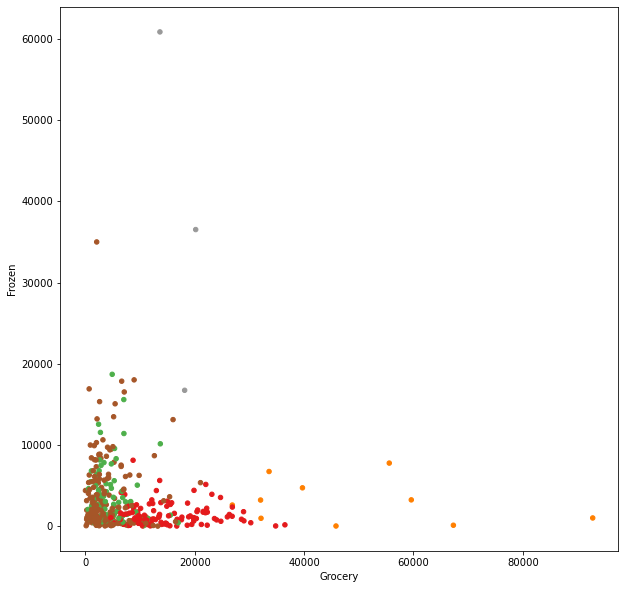

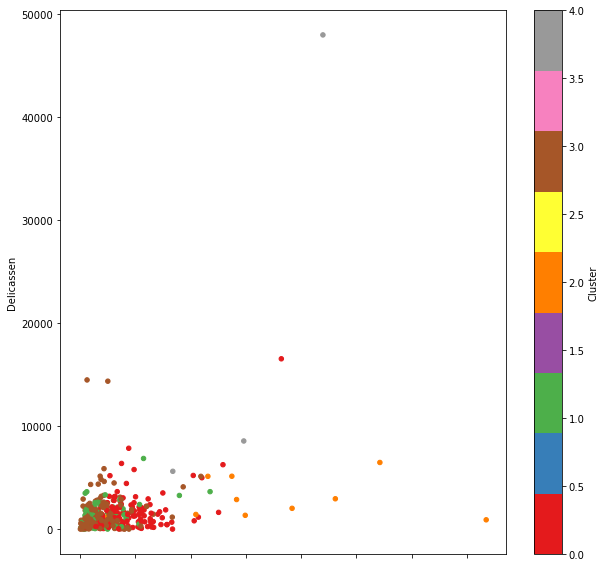

In [88]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [89]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

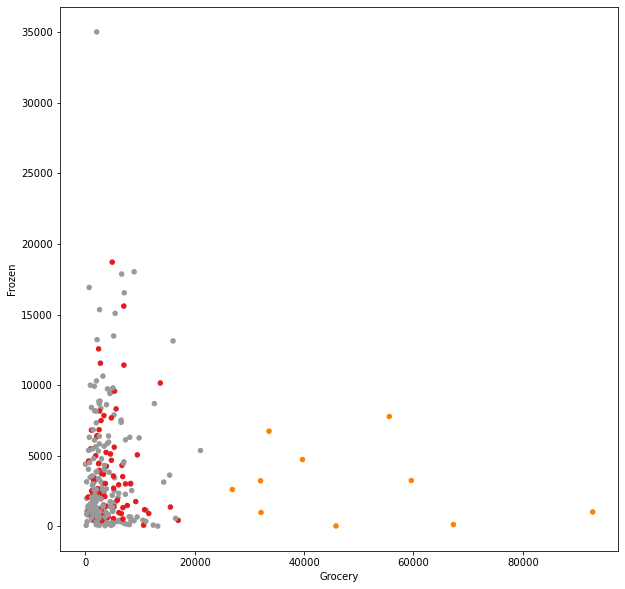

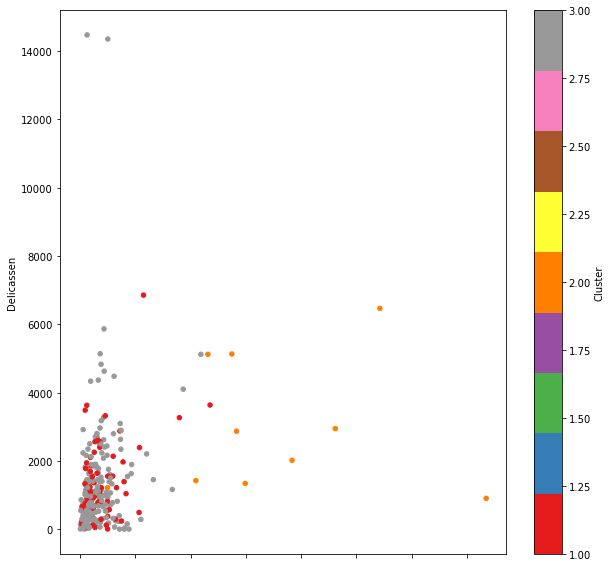

In [90]:
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import folium


'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = './2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0,index_col =0 )

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 열 이름 배열을 출력
print(df.columns.values)   
print('\n')

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']




In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   기타진학  취업   미상       위도        경도  
0     0.004     0  0.000  37.594942  127.038909  
1     0.031     0  0.000  37.577473  127.003857  
2     0.009     0  0.003  37.491637  127.071744  
3     0.019     0  0.000  37.480439  127.062201  
4     0.010     0  0.000  37.510750  127.008900  

[5 rows x 20 columns]




In [3]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB
None




In [4]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

             코드    남학생수    여학생수      일반고    특성화고  ...  \
count  415.000000  415.000000  415.000000  415.000000  415.000000  ...   
mean     3.197590  126.532530  116.173494    0.623080    0.149684  ...   
std      0.804272   79.217906   76.833082    0.211093    0.102977  ...   
min      3.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      3.000000   80.000000   71.500000    0.566500    0.065500  ...   
50%      3.000000  129.000000  118.000000    0.681000    0.149000  ...   
75%      3.000000  177.500000  161.500000    0.758000    0.224500  ...   
max      9.000000  337.000000  422.000000    0.908000    0.477000  ...   

         기타진학   취업        미상        위도        경도  
count  415.000000  415.0  415.000000  415.000000  415.000000  
mean     0.069571    0.0    0.001670   37.491969  127.032792  
std      0.235630    0.0    0.003697    0.348926    0.265245  
min      0.000000    0.0    0.000000   34.979940  126.639561  
25%      0.000000    0.0    0.000000   37.50193

In [5]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

In [6]:
# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)

In [7]:
# 지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [8]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

In [9]:
onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

In [10]:
df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   
print('\n')

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 24 columns]




In [11]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282




In [12]:
# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 

DBSCAN(eps=0.2)

In [13]:
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1  0  1 -1  0  0  1 -1
  2 -1  0 -1 -1 -1 -1  0 -1 -1  1  0 -1  0 -1 -1  0  3  0 -1 -1 -1  2 -1
 -1 -1 -1  0  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1

In [14]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   location  code  type  day  Cluster  
0        16     0     1    0       -1  
1        22     0     1    0       -1  
2         0     0     0    0       -1  
3         0     0     0    0       -1  
4        14     0     0    0       -1  

[5 rows x 25 columns]




In [15]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key : -1
* number : 255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key : 0
* number : 102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key : 1
* number : 45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구     

In [16]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}

In [17]:
cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)


In [18]:
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,         # 투명도    
                        popup=name
    ).add_to(cluster_map)

In [19]:
# 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')


# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')


# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


* key : -1
* number : 281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  type  
0   0.227     1  
1   0.043     1  
2   0.090     0  
3   0.065     0  
4   0.282     0  


* key : 0
* number : 8
       지역      학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교  공립     0.0        0.019   0.044     0
43   송파구  거원중학교  공립     0.0        0.021   0.054     0
51   송파구  방이중학교  공립     0.0        0.021   0.068     0
93   강서구  방원중학교  공립     0.0        0.019 

hi
hi
hi


In [ ]:
1부터 입력받은 숫자 n 사이에 있는 소수의 개수를 반환하는 함수, solution을 만들어 보세요.

소수는 1과 자기 자신으로만 나누어지는 수를 의미합니다.
(1은 소수가 아닙니다.)

In [116]:
def is_prime2(n):
    if n<2:
        return False
    for i in range(2, int(n **0.5)+1):
        if n%i == 0:
            return False
    return True

def is_prime(n):
    if n<2:
        return False
  # 2부터 (x - 1)까지의 모든 수를 확인
    for i in range(2, n):
  # x가 해당 수로 나누어떨어지면
        if n % i == 0:
            return False
    return True

def solution(n):
    answer = 0
    for i in range (2, n+1):
        if (is_prime(i)): 
            answer = answer+1
    return answer

In [117]:
solution(5)

3

None
